In [1]:
# Libreria para RNA
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importar dataset
df = pd.read_csv('datasets/scrap_price.csv')
x= df.iloc[:, [3,21,23,24]].values # fueltypes, horsepower, citympg, highwaympg
y= df.iloc[:, -1].values

In [3]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x[:,0] = label_encoder.fit_transform(x[:,0])

In [4]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))

In [5]:
# train_test_split: divide el dataset en 4 variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[4])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/opt/anaconda3/envs/sis_pred/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Optimizador Adam permite ajustar los pesos y sesgos
# Tasa de aprendizaje 0.1 (un valor bajo aprende lentamente, valor grande aprende rápido pero no seria muy fino el resultado)
# mean_squared_error MSE es la funcion de perdida
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [8]:
print("Entrenando el modelo...")
historial = modelo.fit(x_train, y_train, epochs=1000, verbose=False)
print("Modelo entrenado.")

Entrenando el modelo...
Modelo entrenado.


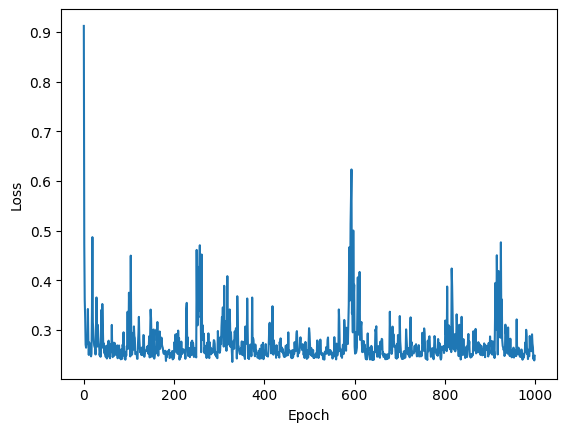

In [9]:
import matplotlib.pyplot as plt
plt.plot(historial.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
print("Realizando predicciones...")
predicciones = modelo.predict(x_test)
for i in range(predicciones.shape[0]):
    print(f"Predicción vs Real {i+1}: {predicciones[i][0]} vs {y_test[i][0]}")

Realizando predicciones...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción vs Real 1: -0.9435035586357117 vs -0.8133305542770792
Predicción vs Real 2: 1.0318485498428345 vs 0.3103504607993222
Predicción vs Real 3: 0.16841477155685425 vs 0.24761003561359346
Predicción vs Real 4: -1.6910147666931152 vs -1.0196210722877552
Predicción vs Real 5: -0.19777941703796387 vs -0.4117918330884154
Predicción vs Real 6: 0.14261412620544434 vs -0.26071288924118063
Predicción vs Real 7: -0.9888719916343689 vs -0.9897566298993484
Predicción vs Real 8: -0.8678887486457825 vs -0.6749251763173617
Predicción vs Real 9: 1.0653531551361084 vs 0.49217221298756403
Predicción vs Real 10: -0.6585553288459778 vs -0.8467084604758869
Predicción vs Real 11: 0.2741174101829529 vs 0.96536049973833
Predicción vs Real 12: 3.2236361503601074 vs 2.274188509537817
Predicción vs Real 13: 0.060339123010635376 vs -0.2925850252355308
Predicción vs Real 14: -0.03494247794151306 vs 0.6358477866628828
Predicción vs Real 15: -1.0